In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from interstellar import Tracks, DenseNetworkGrid, set_seed

In [2]:
name = 'grid_05'
save_path = f'/home/ADF/ajl573/Data/interstellar_data/{name}'
load_path = '/home/ADF/ajl573/Data/interstellar_data'

In [3]:
tracks = Tracks()
tracks.load(load_path)

In [4]:
tracks.get_metadata().head()

,file_name,m,Y,FeH,MLT,ov,dif
0,m1.0Y0.24FeH-0.1MLT2.3ov0.0dif1.csv,1.00,0.24,-0.1,2.3,0.0,1
1,m0.92Y0.28FeH-0.3MLT1.7ov0.0dif1.csv,0.92,0.28,-0.3,1.7,0.0,1
2,m0.82Y0.32FeH0.1MLT2.1ov0.0dif1.csv,0.82,0.32,0.1,2.1,0.0,1
3,m0.82Y0.24FeH0.0MLT1.9ov0.0dif1.csv,0.82,0.24,0.0,1.9,0.0,1
4,m1.17Y0.28FeH0.1MLT2.3ov0.0dif1.csv,1.17,0.28,0.1,2.3,0.0,1


In [5]:
tracks.get_data().head()

,evol_stage,initial_mass,initial_Yinit,initial_feh,initial_MLT,star_mass,star_age,frac_age,effective_T,luminosity,...,log_frac_age_norm,log_initial_mass_norm,initial_feh_norm,log_initial_MLT_norm,log_initial_Yinit_norm,log_star_age_norm,log_effective_T_norm,log_radius_norm,log_delta_nu_fit_norm,star_feh_norm
0,1,1.0,0.24,-0.1,2.3,1.0,0.036467,0.004031,5788.367004,0.760630,...,-2.318958,0.004365,-0.1,0.082974,-0.066947,-2.171683,0.009821,-0.153525,0.227345,-0.005322
1,1,1.0,0.24,-0.1,2.3,1.0,0.037214,0.004114,5779.922526,0.749957,...,-2.310162,0.004365,-0.1,0.082974,-0.066947,-2.162886,0.009187,-0.155325,0.230036,-0.005332
2,1,1.0,0.24,-0.1,2.3,1.0,0.038109,0.004213,5772.288187,0.741406,...,-2.299835,0.004365,-0.1,0.082974,-0.066947,-2.152559,0.008612,-0.156667,0.232046,-0.005344
3,1,1.0,0.24,-0.1,2.3,1.0,0.039184,0.004332,5766.020545,0.735484,...,-2.287759,0.004365,-0.1,0.082974,-0.066947,-2.140483,0.008141,-0.157465,0.233248,-0.005356
4,1,1.0,0.24,-0.1,2.3,1.0,0.040473,0.004474,5761.544407,0.732361,...,-2.273697,0.004365,-0.1,0.082974,-0.066947,-2.126422,0.007803,-0.157715,0.233634,-0.005372


In [6]:
x_cols = ['log_frac_age_norm', 'log_initial_mass_norm', 'initial_feh_norm',
          'log_initial_MLT_norm', 'log_initial_Yinit_norm']
y_cols = ['log_star_age_norm', 'log_effective_T_norm', 'log_radius_norm',
          'log_delta_nu_fit_norm', 'star_feh_norm']

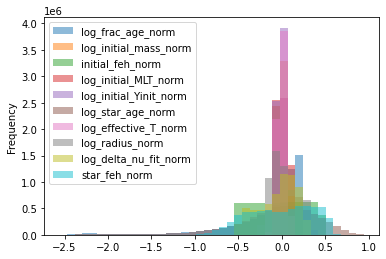

In [7]:
tracks.get_data().plot(kind='hist',
                       y=x_cols+y_cols,
                       bins=40, alpha=0.5)

In [8]:
set_seed(101)

In [9]:
train = tracks.sample_data(fraction=1.0, columns=x_cols+y_cols)
train.head()

,log_frac_age_norm,log_initial_mass_norm,initial_feh_norm,log_initial_MLT_norm,log_initial_Yinit_norm,log_star_age_norm,log_effective_T_norm,log_radius_norm,log_delta_nu_fit_norm,star_feh_norm
5323617,-0.413517,-0.066216,-0.1,0.082974,0.000000,-0.120288,-0.005565,-0.186439,0.241911,-0.047524
4920966,0.165210,0.083546,0.5,0.000000,0.029963,0.151099,-0.074603,0.292163,-0.399585,0.582609
2948371,-0.274013,0.065063,0.0,-0.102662,-0.032185,-0.388351,0.024483,0.018010,0.001718,-0.075572
229413,-0.589022,-0.046245,-0.1,0.082974,0.029963,-0.448385,0.013713,-0.168630,0.224384,-0.032936
1054345,-0.197186,-0.017912,0.4,-0.048305,0.029963,0.090516,-0.034383,-0.105606,0.148063,0.434744


In [10]:
print(f'Length of training data = {len(train)}')

Length of training data = 6454664


In [11]:
depth = [5, 6]
width = [64, 128]
activation = 'elu'
batch_size = int(0.001 * len(train))
regularization_l2 = 0.0
optimizer = 'nadam'
loss = 'mae'
metrics = ['mse']

In [12]:
grid = DenseNetworkGrid(path=save_path, name=name, depth=depth, width=width,
                        activation=activation, batch_size=batch_size, regularization_l2=regularization_l2)

grid.data

,depth,width,activation,batch_size,regularization_l2
name,,,,,
grid_05_0,5,64,elu,6454,0.0
grid_05_1,6,64,elu,6454,0.0
grid_05_2,5,128,elu,6454,0.0
grid_05_3,6,128,elu,6454,0.0


In [13]:
grid.make_networks()

In [14]:
grid.build_all(len(x_cols), len(y_cols))

In [15]:
grid.compile_all(optimizer=optimizer, loss=loss, metrics=metrics)

In [16]:
grid.train_all(train, x_cols, y_cols, epochs=60, validation_split=0.2,
               callbacks=['checkpoint', 'tensorboard'], history_kw={'nth_row': 5})

Add a function which plots history for all networks.

Text(0, 0.5, 'loss (mae)')

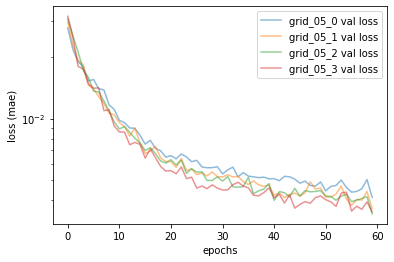

In [17]:
fig, ax = plt.subplots()
for network in grid.networks:
    network.history.plot(ax=ax, x='epochs', y=['val_loss'], logy=True, alpha=0.5,
                         label=[f'{network.name} val loss'])
ax.set_ylabel('loss (mae)')

Below should have y_col names, add this to code.

In [18]:
val = train.tail(int(0.2*len(train)))
val.head()

,log_frac_age_norm,log_initial_mass_norm,initial_feh_norm,log_initial_MLT_norm,log_initial_Yinit_norm,log_star_age_norm,log_effective_T_norm,log_radius_norm,log_delta_nu_fit_norm,star_feh_norm
19625,-0.238393,-0.092545,0.0,-0.102662,0.000000,0.206684,-0.043748,-0.167039,0.202718,0.017609
4203944,0.084788,0.079912,-0.3,-0.048305,0.057992,-0.384709,0.104895,0.132078,-0.192330,-0.447612
2543382,0.162067,-0.041393,0.3,-0.048305,0.000000,0.565698,-0.070023,0.109792,-0.182051,0.345019
59922,-0.259884,0.057443,0.3,-0.048305,-0.032185,-0.204505,-0.004010,-0.035951,0.082012,0.344549
1303557,-0.322364,0.021398,0.1,0.000000,-0.066947,-0.146290,-0.003772,-0.089683,0.142947,0.149114


In [19]:
grid.evaluate_all(val.sample(n=1000))

,mae,mse
name,,
grid_05_0,0.004405,0.000069
grid_05_1,0.003759,0.000041
grid_05_2,0.003530,0.000040
grid_05_3,0.003508,0.000037


In [20]:
grid.data

,depth,width,activation,batch_size,regularization_l2,model_filename,history_filename
name,,,,,,,
grid_05_0,5,64,elu,6454,0.0,grid_05_0_model.h5,grid_05_0_history.csv
grid_05_1,6,64,elu,6454,0.0,grid_05_1_model.h5,grid_05_1_history.csv
grid_05_2,5,128,elu,6454,0.0,grid_05_2_model.h5,grid_05_2_history.csv
grid_05_3,6,128,elu,6454,0.0,grid_05_3_model.h5,grid_05_3_history.csv


In [21]:
import seaborn as sns

In [22]:
len(val)

1290932

In [23]:
val = val.sample(n=10000)

In [24]:
df_dict = {}
for i, network in enumerate(grid.networks):
#     network = grid.networks[i]
    df_dict[network.name] = np.abs(network.predict(val) - val[y_cols].reset_index(drop=True))

In [25]:
df_err = pd.concat(df_dict).reset_index(level=0).rename(columns={'level_0': 'name'})
df_err.head()

,name,log_star_age_norm,log_effective_T_norm,log_radius_norm,log_delta_nu_fit_norm,star_feh_norm
0,grid_05_0,0.003204,0.001758,0.002217,0.000847,0.000618
1,grid_05_0,0.000992,0.003978,0.003104,0.004583,0.005704
2,grid_05_0,0.004441,0.000528,0.001114,0.001264,0.000048
3,grid_05_0,0.009415,0.001963,0.002729,0.000401,0.001414
4,grid_05_0,0.003412,0.000236,0.002202,0.003060,0.001226


In [26]:
df_mae = pd.concat(df_dict).mean(axis=1).reset_index(level=0).rename(columns={'level_0': 'name', 0: 'mae'})
df_mae.head()

,name,mae
0,grid_05_0,0.001729
1,grid_05_0,0.003672
2,grid_05_0,0.001479
3,grid_05_0,0.003185
4,grid_05_0,0.002027


In [27]:
df_mae['log_mae'] = np.log10(df_mae['mae'])

In [28]:
order = df_mae.set_index('name').median(level=0).sort_values('log_mae', ascending=False).index

In [29]:
df_err.head()

,name,log_star_age_norm,log_effective_T_norm,log_radius_norm,log_delta_nu_fit_norm,star_feh_norm
0,grid_05_0,0.003204,0.001758,0.002217,0.000847,0.000618
1,grid_05_0,0.000992,0.003978,0.003104,0.004583,0.005704
2,grid_05_0,0.004441,0.000528,0.001114,0.001264,0.000048
3,grid_05_0,0.009415,0.001963,0.002729,0.000401,0.001414
4,grid_05_0,0.003412,0.000236,0.002202,0.003060,0.001226


In [30]:
df_err_col = df_err.set_index('name').stack().reset_index().rename(columns={'level_1': 'output',
                                                                0: 'abs_err'})

df_err_col['log_abs_err'] = np.log10(df_err_col['abs_err'])

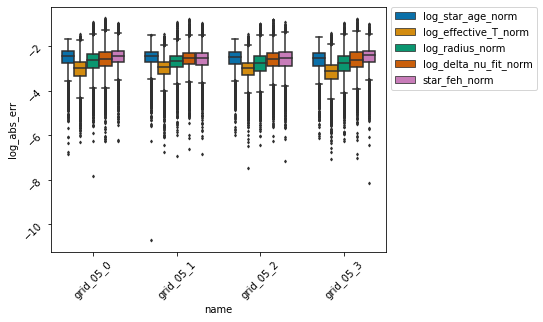

In [31]:
w = 1.5 * len(grid.data)
fig, ax = plt.subplots(figsize=(w, 4.5))
width = 0.15 * len(y_cols)
sns.boxplot(data=df_err_col, x='name', y='log_abs_err', hue='output',
            width=width, fliersize=2, color='C0', palette='colorblind',
            order=order, ax=ax, saturation=0.9)
# ax.set_yscale('log')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
ax.legend(bbox_to_anchor=(1.0, 1.02))

In [34]:
scores = grid.score_all(val)

In [38]:
scores.xs('std', level=1)

,log_star_age_norm,log_effective_T_norm,log_radius_norm,log_delta_nu_fit_norm,star_feh_norm
grid_05_0,0.003162,0.002597,0.006216,0.009282,0.007472
grid_05_1,0.003174,0.002204,0.005380,0.008191,0.005376
grid_05_2,0.002668,0.002117,0.005175,0.007659,0.005703
grid_05_3,0.003100,0.002012,0.005279,0.008048,0.004532
